# НЕЙРОННЫЕ СЕТИ

# Определение тональности текста отзывов [YELP](https://www.yelp.com/dataset)

"Ищете ли вы только что открывшуюся пиццерию или кафе поблизости, Yelp - ваш местный гид по поиску идеального места, где можно поесть, сделать покупки, выпить, расслабиться и поиграть" - Yelp

Набор данных о тональности отзывов Yelp построен с учетом звезд 1 и 2 как отрицательных, а звезд 3 и 4 как положительных. Всего имеется 560 000 обучающих и 38 000 тестовых образцов. Отрицательная тональность относится к классу 1, а положительная — к классу 2.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Загрузка набора данных

In [3]:
!wget https://www.dropbox.com/s/ys8k290oev43h8x/yelp_review_polarity_csv.tgz?dl=1 -O yelp_review_polarity_csv.tgz

--2023-06-17 06:20:17--  https://www.dropbox.com/s/ys8k290oev43h8x/yelp_review_polarity_csv.tgz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/ys8k290oev43h8x/yelp_review_polarity_csv.tgz [following]
--2023-06-17 06:20:17--  https://www.dropbox.com/s/dl/ys8k290oev43h8x/yelp_review_polarity_csv.tgz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc741c913e3c44579c7b028cd4f8.dl.dropboxusercontent.com/cd/0/get/B-LHbblTJffdWA6gIyZzj47pMXR26QUgw4_SJDN38lfbYnvsrdS2YlBCTePjV7cJxPuA1NUvouFynQkFcz2QeudTwRQfdoY9FnDPc-6dLh-h3xRgNn3Xm_gLrsQAt6hrYzo81DJryBXYmesUppRgZEDeJC5eBTsnJXR-nKXXk0D1PlbZ0nhfVrNHx7yedRpHjbw/file?dl=1# [following]
--2023-06-17 06:20:18--  https://uc741c913e3c44579c7b028cd4f8.dl.dropboxusercontent.com/cd/0/get/B-LHbblTJ

In [4]:
!tar -xvf yelp_review_polarity_csv.tgz

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv


## Загружаем данные в память

In [5]:
train = pd.read_csv('yelp_review_polarity_csv/train.csv',
                    header=None,
                    names=['Class', 'Review'])
train

,Class,Review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...
...,...,...
559995,2,Ryan was as good as everyone on yelp has claim...
559996,2,Professional \nFriendly\nOn time AND affordabl...
559997,1,Phone calls always go to voicemail and message...
559998,1,Looks like all of the good reviews have gone t...


Выделяем данные для обучения

In [6]:
reviews = train['Review']
reviews[:5]

0    Unfortunately, the frustration of being Dr. Go...
1    Been going to Dr. Goldberg for over 10 years. ...
2    I don't know what Dr. Goldberg was like before...
3    I'm writing this review to give you a heads up...
4    All the food is great here. But the best thing...
Name: Review, dtype: object

Выделяем правильные ответы

In [7]:
y_train = train['Class'] - 1
y_train

0         0
1         1
2         0
3         0
4         1
         ..
559995    1
559996    1
559997    0
559998    0
559999    1
Name: Class, Length: 560000, dtype: int64

Тоже самое делаем для тестовых данных

In [8]:
test = pd.read_csv('yelp_review_polarity_csv/test.csv',
                    header=None,
                    names=['Class', 'Review'])
reviews_test = test['Review']
y_test = test['Class'] - 1
y_test

0        1
1        0
2        1
3        0
4        1
        ..
37995    0
37996    1
37997    0
37998    0
37999    0
Name: Class, Length: 38000, dtype: int64

## Токенизация текста

Токенизировать - значит, поделить текст на части: слова, ключевые слова, фразы, символы и т.д., иными словами **токены**.

Самый наивный способ токенизировать текст - разделить с помощью функции `split()`. Но `split` упускает очень много всего, например, не отделяет пунктуацию от слов. Кроме этого, есть ещё много менее тривиальных проблем, поэтому лучше использовать готовые токенизаторы.

⏰⏰⏰**Ввод данных 1**

In [9]:
# введите свою фразу
sentence = 'Если б мне платили каждый раз, Каждый раз, когда я думаю о тебе, Я бы бомжевала возле трасс, Я бы стала самой бедной из людей.'
sentence.split()

['Если',
 'б',
 'мне',
 'платили',
 'каждый',
 'раз,',
 'Каждый',
 'раз,',
 'когда',
 'я',
 'думаю',
 'о',
 'тебе,',
 'Я',
 'бы',
 'бомжевала',
 'возле',
 'трасс,',
 'Я',
 'бы',
 'стала',
 'самой',
 'бедной',
 'из',
 'людей.']

Воспользуемя продвинутым готовым токенизатором в библиотеке nltk. В nltk вообще есть довольно много токенизаторов, которые выполняют различные задачи. Более подробно [здесь](https://www.nltk.org/api/nltk.tokenize.html).

Примеры использования разлиных имеющихся токенизаторов можно по [ссылке](https://github.com/newtechaudit/NLTK_tokenize/blob/main/NLTK_tokenize.ipynb).



Чтобы использовать токенизатор ```word_tokenize```, нужно сначала скачать данные для nltk о пунктуации и стоп-словах. Это просто требование nltk.

Стоп-слова - это слова, которые часто встречаются практически в любом тексте и ничего интересного не говорят о конретном документе. Для модели это просто шум. А шум нужно убирать. По аналогичной причине убирают и пунктуацию.

In [10]:
import nltk # библиотека nltk
from nltk.tokenize import word_tokenize # готовый токенизатор библиотеки nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
word_tokenize(sentence)

['Если',
 'б',
 'мне',
 'платили',
 'каждый',
 'раз',
 ',',
 'Каждый',
 'раз',
 ',',
 'когда',
 'я',
 'думаю',
 'о',
 'тебе',
 ',',
 'Я',
 'бы',
 'бомжевала',
 'возле',
 'трасс',
 ',',
 'Я',
 'бы',
 'стала',
 'самой',
 'бедной',
 'из',
 'людей',
 '.']

In [12]:
# импортируем стоп-слова из библиотеки nltk
from nltk.corpus import stopwords

# посмотрим на стоп-слова
print(stopwords.words('english'))
print(stopwords.words('russian'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

⏰⏰⏰**Ввод данных 2**

In [13]:
# попробовать разный noise
from string import punctuation

print(list(punctuation))

stop = stopwords.words('english')

del stop[0:10]

print(stop)
noise = stop + ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.']

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
["you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most',

# Векторизаторы

Векторизатор преобразует слово или набор слов в числовой вектор, понятный алгоритму машинного обучения, который привык работать с числовыми табличными данными.

## Мешок слов


In [14]:
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer # модель "мешка слов"

Самый простой способ извлечь признаки из текстовых данных -- векторизаторы: `CountVectorizer` и `TfidfVectorizer`

Объект `CountVectorizer` делает следующую вещь:
* строит для каждого документа (каждой пришедшей ему строки) вектор размерности `n`, где `n` -- количество слов или n-грам во всём корпусе
* заполняет каждый i-тый элемент количеством вхождений слова в данный документ

<a href="https://drive.google.com/uc?id=1ukv-FTj0jeVdcgVlOaNBocUfNuYGGVZg
" target="_blank"><img src="https://drive.google.com/uc?id=1jHmkrGZTMawM46Yzxh243Ur1y5pYKzrl"
alt="IMAGE ALT TEXT HERE" width="600" border="0" /></a>

Самые мелкие структуры языка, с которыми мы работаем, называются **n-граммами**.
У n-граммы есть параметр n - количество слов, которые попадают в такое представление текста.
* Если n = 1 - то мы смотрим на то, сколько раз каждое слово встретилось в тексте. Получаем _униграммы_
* Если n = 2 - то мы смотрим на то, сколько раз каждая пара подряд идущих слов, встретилась в тексте. Получаем _биграммы_

На рисунке пример векторизации для униграмм, но можно использовать любые n-граммы. Для этого у объекта ```CountVectorizer()``` есть параметр **ngram_range**, который отвечает за то, какие n-граммы мы используем в качестве признаков:<br/>
ngram_range=(1, 1) -- униграммы<br/>
ngram_range=(3, 3) -- триграммы<br/>
ngram_range=(1, 3) -- униграммы, биграммы и триграммы.

Собирем векторизатор, передав ему на вход:
* какие n-граммы нам нужны, параметр **ngram_range**;
* какой токенизатор мы используем, параметр **tokenizer**;
* какие у нас стоп-слова, параметр **stop_words**.

In [15]:
vectorizer = CountVectorizer(ngram_range=(1, 1),
                             tokenizer=word_tokenize,
                             stop_words=noise)
%time vectorized_x_train = vectorizer.fit_transform(reviews)
list(vectorizer.vocabulary_.items())[:10]

CPU times: user 9min 56s, sys: 2.13 s, total: 9min 58s
Wall time: 10min 3s


[('unfortunately', 599590),
 ('frustration', 269464),
 ('dr.', 218245),
 ('goldberg', 281342),
 ("'s", 4373),
 ('patient', 435057),
 ('repeat', 481277),
 ('experience', 242028),
 ('i', 314513),
 ("'ve", 5487)]

In [16]:
vectorized_x_train.shape

(560000, 643271)

In [17]:
clf = LogisticRegression(random_state=19, solver='saga') # фиксируем random_state для воспроизводимости результатов
clf.fit(vectorized_x_train, y_train)

LogisticRegression(random_state=19, solver='saga')

In [18]:
vectorized_x_test = vectorizer.transform(reviews_test)

In [19]:
from sklearn.metrics import classification_report
pred = clf.predict(vectorized_x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     19000
           1       0.92      0.93      0.92     19000

    accuracy                           0.92     38000
   macro avg       0.92      0.92      0.92     38000
weighted avg       0.92      0.92      0.92     38000



## TF-IDF

`TfidfVectorizer` делает то же, что и `CountVectorizer`, но в качестве значений выдает **tf-idf** каждого слова.

Как считается tf-idf:

**TF (term frequency)** –  отношение числа вхождений некоторого слова к общему числу слов документа. Таким образом, оценивается важность слова t в пределах отдельного документа.:

$$ TF(t,d) = \frac{n_{t}}{\sum_k n_{k}} $$

$$or$$

$$T F(t, d)=\frac{\text { Term t frequency in document } d}{\text { Total words in document d }}$$

**IDF (inverse document frequency)** – инверсия частоты, с которой некоторое слово встречается в документах коллекции. Учёт IDF уменьшает вес широкоупотребительных слов.

$$ IDF(t, D) = \mbox{log} \frac{|D|}{|{d : t \in d}|} $$

$$or$$

$$ IDF(t, D)=\log \left(\frac{\text { Total documents D}}{\text { documents with term t }}\right) $$

Перемножаем их:
$$TF-IDF(t, d, D) = TF(t,d) \times IDF(i, D)$$

TF-IDF - статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.

Сакральный смысл: cлова, неважные для вообще всех документов, например, предлоги или междометия — получат очень низкий вес TF-IDF (потому что часто встречаются во всех-всех документах), а важные — высокий.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1),
                                   tokenizer=word_tokenize)

# обучаем его и сразу применяем к x_train
%time tfidf_vectorized_x_train = tfidf_vectorizer.fit_transform(reviews)

# инициализируем и обучаем классификатор
clf = LogisticRegression(random_state=19, solver='saga')
clf.fit(tfidf_vectorized_x_train, y_train)

# применяем обученный векторизатор к тестовым данным
tfidf_vectorized_x_test = tfidf_vectorizer.transform(reviews_test)

# получаем предсказания и выводим информацию о качестве
pred = clf.predict(tfidf_vectorized_x_test)
print(classification_report(y_test, pred))

CPU times: user 10min 33s, sys: 2.75 s, total: 10min 36s
Wall time: 10min 39s
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     19000
           1       0.94      0.94      0.94     19000

    accuracy                           0.94     38000
   macro avg       0.94      0.94      0.94     38000
weighted avg       0.94      0.94      0.94     38000



In [21]:
cool_token = ')'
pred = [1 if cool_token in review else 0 for review in reviews_test]
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.51      0.70      0.59     19000
           1       0.51      0.31      0.39     19000

    accuracy                           0.51     38000
   macro avg       0.51      0.51      0.49     38000
weighted avg       0.51      0.51      0.49     38000



# Embeddings

Семантическое представление слова, или семантический вектор слова (word embedding) – это представление слова как точки в многомерном пространстве. Данный тип вектора еще называют плотным, так как он имеет очень компактное представление (для решения многих задач хватает вектора длиной 300 элементов). При правильном построении алгоритма и достаточно большом корпусе слов для обучения семантически близкие слова должны лежать близко в N-мерном пространстве, в котором представляется вектор слова.

Подобные представления (Embedding) могут строиться в процессе обучения нейронной сети для решения конкретной задачи, для этого применяется специальный слой Embedding.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [23]:
num_words = 10000 # ограничение длины используемого словаря
max_review_len = 100 # ограничение длины отзыва

Будем использовать токенизатор Keras, он считается проще и поэтому быстрее. Создадим и обучим токенизатор.

In [24]:
tokenizer = Tokenizer(num_words=num_words)

In [25]:
%time tokenizer.fit_on_texts(reviews)

CPU times: user 52.7 s, sys: 149 ms, total: 52.9 s
Wall time: 53 s


Преобразуем отзывы Yelp в числовое представление

In [26]:
sequences = tokenizer.texts_to_sequences(reviews)

In [27]:
index = 15
print(reviews[index])
print(sequences[index])

Very disappointed in the customer service. We ordered Reuben's  and wanted coleslaw instead of kraut. They charged us $3.00 for the coleslaw. We will not be back . The iced tea is also terrible tasting.
[42, 337, 10, 1, 218, 52, 15, 89, 2, 192, 2915, 389, 7, 19, 737, 70, 164, 591, 9, 1, 2915, 15, 66, 22, 30, 54, 1, 1327, 525, 11, 84, 462, 928]


In [28]:
tokenizer.word_index['coleslaw']

2915

Ограничиваем длину отзывов

In [29]:
x_train = pad_sequences(sequences, maxlen=max_review_len)

In [30]:
x_train[:2]

array([[   7,    1,  137,  112,   24,   18,   27,  189,   80, 3128,   10,
        2636,   34, 1416,  462,  129,    8,  519,   13,  177,  129,  803,
          88, 3812,    1,  446,    8,  392,  841,  115,  360,    7, 4136,
        1438,    4,   43,   59, 1266,  118,   95,   46,    9,   13,   49,
        1687,    4,  418,   18,    8,    3,   23,  563,  178,   16,  460,
          18,  189,   80, 3128,    2,    3,   40,   78,   43,    8,   20,
          23,  644, 1343,   20,   23, 3252,   18, 2921,  637,  227,  430,
         476, 4312,    1,  446,   63,    2,   22,  215,    1,   63,   18,
        2269,   13,    3,  249,   13,    3,   23,    4,  163,  939,  115,
         237],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   69,  116,
           4,  939,    9,   94,  201,  274,    3,  142,    3,    6,   44,
           7,  177, 2084, 3252,   47,   62,  422,   25, 1334,   69,   51,
          94,    1,  274,    2,   11,   61,   37,   56,    1,  219, 1403,
           8,   11,   7

## Обучим нейронную сеть с коротким векторным представлением

Расмсмотрим новый вид слоя нейронной сети Embedding, его параметры:

`input_dim` – длина словаря (количество уникальных слов в корпусе документов);

`output_dim` – размерность плотного вектора на выходе из слоя Embedding;

`input_length` – длина входной последовательности.

⏰⏰⏰**Ввод данных 3**

In [31]:
# Поменяйте параметры сети (например, dropout) и/или архитектуру - можно добавить слой, количество эпох и/или batch_size
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=2, input_length=max_review_len))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=256,
                    validation_split=0.1)

Epoch 1/10
1969/1969 [==============================] - 79s 39ms/step - loss: 0.3239 - accuracy: 0.8604 - val_loss: 0.1842 - val_accuracy: 0.9323
Epoch 2/10
1969/1969 [==============================] - 17s 9ms/step - loss: 0.2316 - accuracy: 0.9084 - val_loss: 0.1757 - val_accuracy: 0.9338
Epoch 3/10
1969/1969 [==============================] - 12s 6ms/step - loss: 0.2251 - accuracy: 0.9114 - val_loss: 0.1745 - val_accuracy: 0.9345
Epoch 4/10
1969/1969 [==============================] - 12s 6ms/step - loss: 0.2228 - accuracy: 0.9119 - val_loss: 0.1734 - val_accuracy: 0.9342
Epoch 5/10
1969/1969 [==============================] - 11s 6ms/step - loss: 0.2220 - accuracy: 0.9126 - val_loss: 0.1738 - val_accuracy: 0.9346
Epoch 6/10
1969/1969 [==============================] - 12s 6ms/step - loss: 0.2211 - accuracy: 0.9129 - val_loss: 0.1741 - val_accuracy: 0.9343
Epoch 7/10
1969/1969 [==============================] - 12s 6ms/step - loss: 0.2208 - accuracy: 0.9133 - val_loss: 0.1739 - val_a

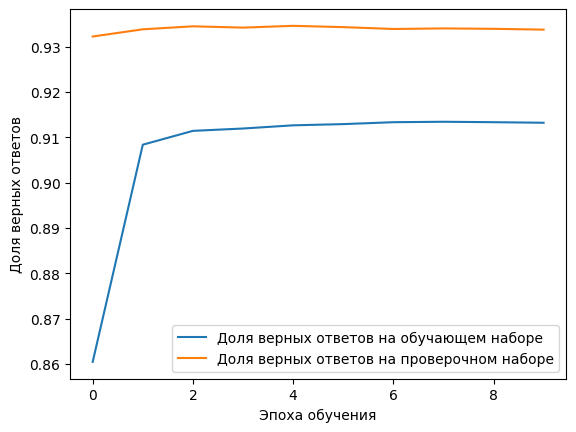

In [34]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [35]:
test_sequences = tokenizer.texts_to_sequences(test['Review'])
x_test = pad_sequences(test_sequences, maxlen=max_review_len)

scores = model.evaluate(x_test, y_test, verbose=1)

1188/1188 [==============================] - 4s 3ms/step - loss: 0.2014 - accuracy: 0.9228


## Посмотрим на плотное векторное представление слов (embeddings)

In [36]:
embedding_matrix = model.layers[0].get_weights()[0]
embedding_matrix[:5]

array([[ 0.0009134 ,  0.00367958],
       [-0.00067676, -0.01163552],
       [ 0.05685791,  0.05440509],
       [ 0.04018993,  0.03629873],
       [-0.03934397, -0.03131473]], dtype=float32)

In [37]:
word = 'coleslaw' # салат из капусты
word_number = tokenizer.word_index[word]
print('Номер слова', word_number)
print('Вектор для слова', embedding_matrix[word_number])

Номер слова 2915
Вектор для слова [-0.02130635  0.02262919]


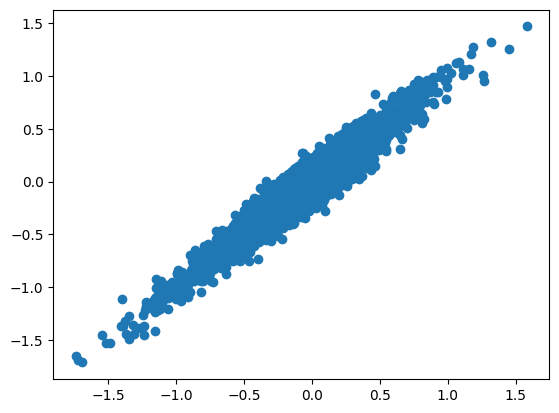

In [38]:
plt.scatter(embedding_matrix[:,0], embedding_matrix[:,1])

⏰⏰⏰**Ввод данных 4**

In [39]:
# используйте свой набор слов: измените слова, имеющие эмоциональный окрас и добавьте нейтральные слова
review_word = ['great',  'perfect', 'good',
          'bad', 'awful', 'unpleasant', 'terrible', 'dirty']
enc_review = []
for word in review_word:
    enc_review.append(tokenizer.word_index[word])
enc_review

[51, 388, 34, 143, 692, 3111, 462, 633]

In [40]:
review_vectors = embedding_matrix[enc_review]
review_vectors

array([[ 0.58859384,  0.55957466],
       [ 0.82198715,  0.93282163],
       [ 0.2361844 ,  0.22541954],
       [-0.26061684, -0.20652726],
       [-1.1469307 , -1.0908444 ],
       [-0.6101918 , -0.73023176],
       [-1.1672335 , -1.1332078 ],
       [-0.67581695, -0.6945635 ]], dtype=float32)

Визуализация обученного плотного векторного представления слов, по которым можно определить эмоциональную окраску текста

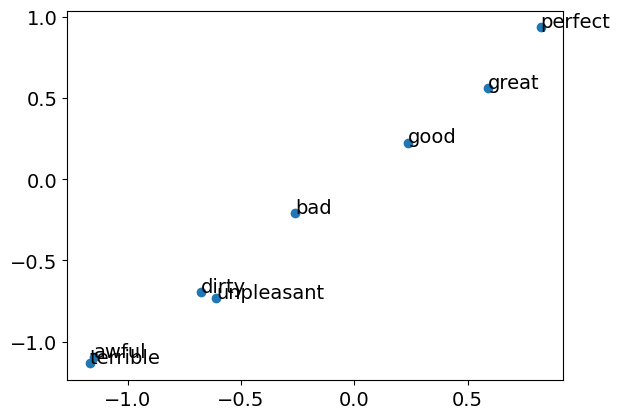

In [41]:
plt.rcParams.update({'font.size': 14})
plt.scatter(review_vectors[:,0], review_vectors[:,1])
for i, txt in enumerate(review_word):
    plt.annotate(txt, (review_vectors[i,0], review_vectors[i,1]))

## Обучим нейронную сеть с длинным векторным представлением

⏰⏰⏰**Ввод данных 5**

In [42]:
# поменяйте настройки сети: dropout, размер векторного представления в слое Embedding, количество нейронов в полносвязной части сети (можно добавить слой), количество эпох, размер бача
model_big = Sequential()
model_big.add(Embedding(num_words, 32, input_length=max_review_len))
model.add(Dropout(0.4))
model_big.add(Flatten())
model_big.add(Dense(64))
model.add(Dropout(0.8))
model_big.add(Dense(1, activation='sigmoid'))

In [43]:
model_big.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
history = model_big.fit(x_train,
                    y_train,
                    epochs=3,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/3
3938/3938 [==============================] - 101s 25ms/step - loss: 0.2326 - accuracy: 0.9058 - val_loss: 0.1774 - val_accuracy: 0.9331
Epoch 2/3
3938/3938 [==============================] - 27s 7ms/step - loss: 0.1884 - accuracy: 0.9269 - val_loss: 0.1794 - val_accuracy: 0.9300
Epoch 3/3
3938/3938 [==============================] - 23s 6ms/step - loss: 0.1425 - accuracy: 0.9460 - val_loss: 0.2055 - val_accuracy: 0.9211


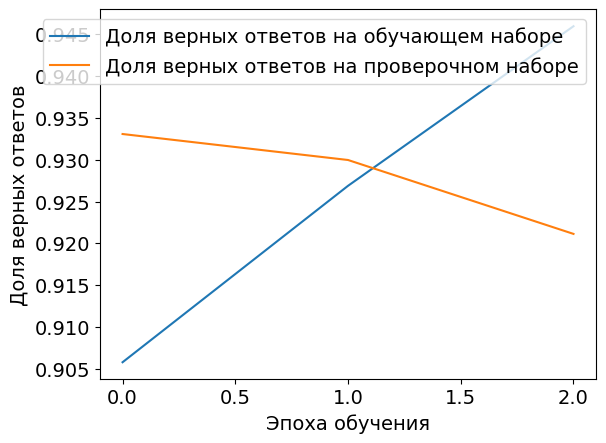

In [45]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [46]:
model_big.evaluate(x_test, y_test, verbose=1)

1188/1188 [==============================] - 3s 3ms/step - loss: 0.2380 - accuracy: 0.9103


[0.2379736304283142, 0.9103420972824097]

## Оцениваем тональность на собственном отзыве

⏰⏰⏰**Ввод данных 6**

In [52]:
text = '''Despite the common belief that this restaurant is outstanding,
I find this point of view a sweeping generalization.
Personally, I find this restaurant quite below the expectations if not to say pathetic.
Poor service combined with absolutely ordinary cuisine makes me feel puzzled regarding such an overrated evaluation.
'''

In [53]:
sequence = tokenizer.texts_to_sequences([text])
sequence

[[1119,
  1,
  2153,
  7520,
  13,
  16,
  104,
  11,
  1237,
  3,
  185,
  16,
  404,
  7,
  653,
  5,
  1546,
  3,
  185,
  16,
  104,
  334,
  1413,
  1,
  1214,
  39,
  22,
  4,
  145,
  3188,
  564,
  52,
  3676,
  18,
  495,
  3357,
  1593,
  472,
  32,
  249,
  8689,
  2928,
  381,
  59,
  3169]]

In [54]:
data = pad_sequences(sequence, maxlen=max_review_len)
data

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        1119,    1, 2153, 7520,   13,   16,  104,   11, 1237,    3,  185,
          16,  404,    7,  653,    5, 1546,    3,  185,   16,  104,  334,
        1413,    1, 1214,   39,   22,    4,  145, 3188,  564,   52, 3676,
          18,  495, 3357, 1593,  472,   32,  249, 8689, 2928,  381,   59,
        3169]], dtype=int32)

In [55]:
result = model.predict(data)
result

1/1 [==============================] - 0s 23ms/step


array([[0.00218903]], dtype=float32)

In [56]:
if result < 0.5:
    print('Отзыв отрицательный')
else:
    print('Отзыв положительный')

Отзыв отрицательный
